In [12]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [13]:
#Load stock and crypto price files
stock_data = "Resources/all_stock_data.csv"
crypto_data = "Resources/all_crypto_data.csv"

# Create Daily Dataframes
stock_df2 = pd.read_csv(stock_data)
stock_df2['date'] = pd.to_datetime(stock_df2['date'])
crypto_df2 = pd.read_csv(crypto_data) 
crypto_df2['date'] = pd.to_datetime(crypto_df2['date'])

# Create stock price DataFrames
stock_df = pd.read_csv(stock_data)
stock_df['date'] =  pd.to_datetime(stock_df['date'])
stock_df['weekday'] = stock_df['date'].dt.weekday
stock_df.set_index('date', inplace=True, drop=True)

crypto_df = pd.read_csv(crypto_data) 
crypto_df['date'] =  pd.to_datetime(crypto_df['date'])
crypto_df['weekday'] = crypto_df['date'].dt.weekday
crypto_df.set_index('date', inplace=True, drop=True)

wkly_crypto_df = crypto_df.loc[crypto_df['weekday'] == 1]
wkly_crypto_df.drop(columns='weekday', axis=1,inplace=True)
wkly_crypto_df.columns = ['BTC','XRP','ETH','LTC','EOS','DASH']
wkly_crypto_df = wkly_crypto_df.pct_change()*100

wkly_stock_df = stock_df.loc[stock_df['weekday'] == 1]
wkly_stock_df.drop(columns=['weekday','close_mu','close_amd'], axis=1,inplace=True)
wkly_stock_df.columns = ['NVDA','S&P500']
wkly_stock_df = wkly_stock_df.pct_change()*100

### Comparison of Cryptos
* The six cryptos had a similar increase and decrease in daily prices and percent change from Jan 2017 - Dec 2018.
* The peak prices across the cryptos included in this analysis was in Dec 2017 and Jan 2018.
* Ripple and Litecoin had the most significant spikes within the timeframe analyzed.

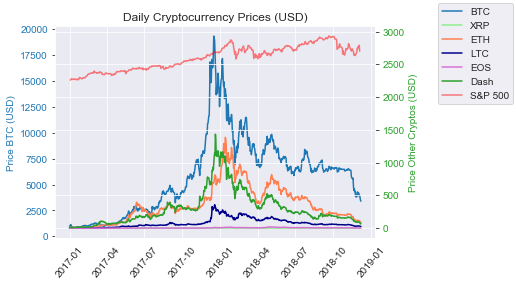

In [14]:
# Price chart of selected cryptos
fig, ax1 = plt.subplots()
ax1.set_title('Daily Cryptocurrency Prices (USD)')
sns.set_style('darkgrid')
ax1.grid(axis='y')
color = 'tab:blue'
ax1.set_ylabel('Price BTC (USD)', color=color)
ax1.plot(crypto_df2['date'], crypto_df2['close_btc'], color=color,label="BTC")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=50)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.grid(axis='x')
sns.set_style('darkgrid')
ax2.set_ylabel('Price Other Cryptos (USD)', color=color)  
ax2.plot(crypto_df2['date'], crypto_df2['close_xrp'],color='lightgreen',label="XRP")
ax2.plot(crypto_df2['date'], crypto_df2['close_eth'],color='coral', label="ETH")
ax2.plot(crypto_df2['date'], crypto_df2['close_ltc'],color='darkblue', label="LTC")
ax2.plot(crypto_df2['date'], crypto_df2['close_eos'],color='orchid', label="EOS")
ax2.plot(crypto_df2['date'], crypto_df2['close_dash'],color=color,label="Dash")
ax2.plot(stock_df2['date'], stock_df2['S&P 500'],color='red',label="S&P 500",alpha=.5,linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/daily_prices_crypto.png")

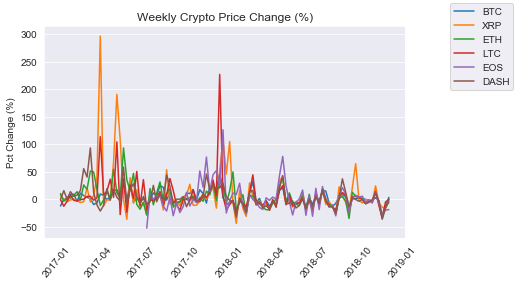

In [15]:
# Chart Weekly Pct Change for Cryptos
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Crypto Price Change (%)')
ax.set_ylabel('Pct Change (%)')
ax.plot(wkly_crypto_df)
plt.xticks(rotation=50)
fig.legend(['BTC','XRP','ETH','LTC','EOS','DASH'],bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/wkly_pct_chg_crypto.png")

### NVDA Stock vs. the S& P¶
* NVDA prices closely followed the S&P 500, but had a greater incread/decrease in percent change.

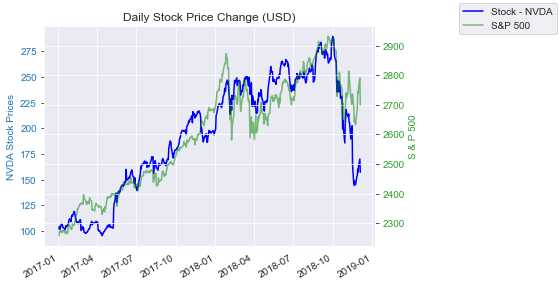

In [16]:
# Compare Stock Prices with S & P 500
fig, ax1 = plt.subplots()
sns.set_style('darkgrid')
color = 'tab:blue'
ax1.set_title('Daily Stock Price Change (USD)')
ax1.grid(axis='y')
ax1.set_ylabel('NVDA Stock Prices', color=color)

#ax1.plot(crypto_df2['date'], crypto_df2['close_xrp'],color='lightblue', label="xrp")
ax1.plot(stock_df2['date'], stock_df2['close_nvda'], color='blue', label="Stock - NVDA")
ax1.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
sns.set_style('darkgrid')
ax2.grid(axis='x')
ax2.set_ylabel('S & P 500', color=color)  
ax2.plot(stock_df2['date'], stock_df2['S&P 500'], color='green',label='S&P 500', alpha=.5)
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.3, 1.0))
fig.tight_layout()
fig.savefig("Images/daily_prices_stock.png")

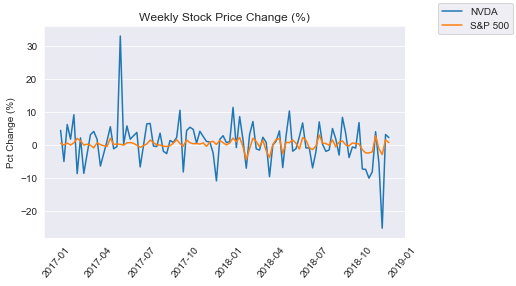

In [17]:
# Chart Weekly Pct Change for Stock
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Stock Price Change (%)')
ax.set_ylabel('Pct Change (%)')
ax.plot(wkly_stock_df)
plt.xticks(rotation=50)
fig.legend(['NVDA','S&P 500'],bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/wkly_pct_chg_stock.png")

### NVDA Stock vs. Cryptos
* BTC peaks in Dec 2018 while the stocks continue to rise until Oct 2018.
* BTC continues to fall along with stock prices after Oct 2018.
* ETH follows a similar pattern to BTC, but peaks slightly later in Jan 2018 before it begins a significant drop.
* For percent change, there were periods where the crypto changes were moving with the changes in stocks prices and other periods where they moved in the opposite direction.   
* ETH had higher percent changes than BTC.

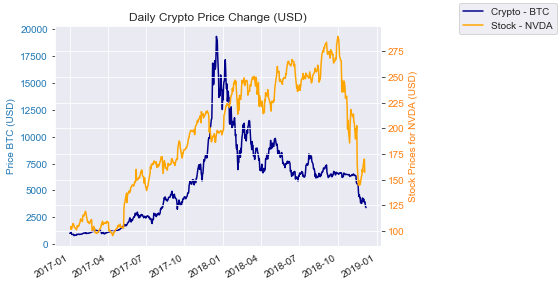

In [18]:
# Compare Bitcoin with Stock Prices
fig, ax1 = plt.subplots()
sns.set_style('darkgrid')
color = 'tab:blue'
ax1.set_title('Daily Crypto Price Change (USD)')
ax1.grid(axis='y')
ax1.set_ylabel('Price BTC (USD)', color=color)
ax1.plot(crypto_df2['date'], crypto_df2['close_btc'], color='darkblue', label="Crypto - BTC")
ax1.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
sns.set_style('darkgrid')
ax2.grid(axis='x')
ax2.set_ylabel('Stock Prices for NVDA (USD)', color=color)  
ax2.plot(stock_df2['date'], stock_df2['close_nvda'],color='orange',label="Stock - NVDA")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.3, 1.0))
fig.tight_layout()
fig.savefig("Images/daily_prices_btc_stocks.png")

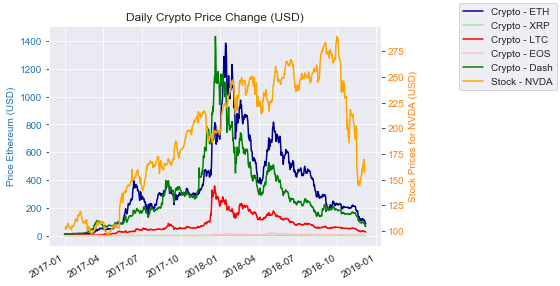

In [19]:
# Compare the other Cryptos with Stock Prices
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_title('Daily Crypto Price Change (USD)')
sns.set_style('darkgrid')
ax1.set_ylabel('Price Ethereum (USD)', color=color)
ax1.plot(crypto_df2['date'], crypto_df2['close_eth'], color='darkblue',label="Crypto - ETH")
ax1.plot(crypto_df2['date'], crypto_df2['close_xrp'], color='lightgreen',label="Crypto - XRP")
ax1.plot(crypto_df2['date'], crypto_df2['close_ltc'], color='red',label="Crypto - LTC")
ax1.plot(crypto_df2['date'], crypto_df2['close_eos'], color='pink',label="Crypto - EOS")
ax1.plot(crypto_df2['date'], crypto_df2['close_dash'], color='green',label="Crypto - Dash")
ax1.tick_params(axis='y', labelcolor=color)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.grid(axis='both')
ax2.set_ylabel('Stock Prices for NVDA (USD)', color=color)  
ax2.plot(stock_df2['date'], stock_df2['close_nvda'],color='orange', label="Stock - NVDA")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend(bbox_to_anchor=(1.3, 1.0))
fig.tight_layout()
fig.savefig("Images/daily_prices_eth_stocks.png")

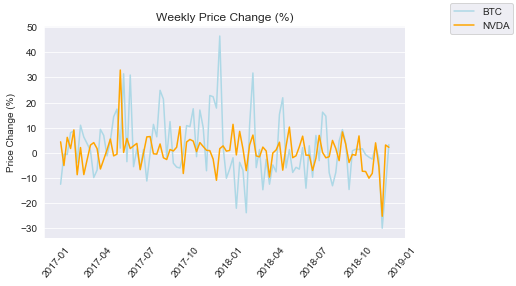

In [20]:
# Chart of BTC and NVDA
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Price Change (%)')
ax.set_ylabel('Price Change (%)')
ax.plot(wkly_crypto_df.index, wkly_crypto_df['BTC'], color='lightblue', label='BTC')
ax.plot(wkly_stock_df.index, wkly_stock_df['NVDA'], color='orange', label='NVDA')
ax.tick_params(axis='y')
plt.xticks(rotation=50)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/wkly_pct_chg_nvda_btc.png")

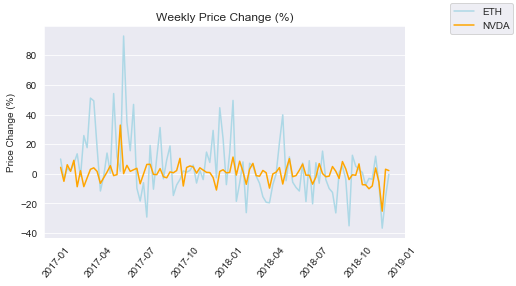

In [21]:
# Chart of ETH and NVDA
fig, ax = plt.subplots()
ax.grid(axis='x')
sns.set_style('darkgrid')
ax.set_title('Weekly Price Change (%)')
ax.set_ylabel('Price Change (%)')
ax.plot(wkly_crypto_df.index, wkly_crypto_df['ETH'], color='lightblue', label='ETH')
ax.plot(wkly_stock_df.index, wkly_stock_df['NVDA'], color='orange', label='NVDA')
ax.tick_params(axis='y')
plt.xticks(rotation=50)
fig.legend(bbox_to_anchor=(1.2, 1.0))
fig.tight_layout() 
fig.savefig("Images/wkly_pct_chg_nvda_eth.png")